# Описание проекта:

На основе данных из открытых источников доступна историческая информация о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


# Цель:

 Выявить актуальные и успешные платформы для планирования рекламнной кампании на 2017г.

# План проекта:

 1. Подготовить полученные данные ( замена тип данных, заполнение пропусков и тд)
   
 2. Провести исследовательский анализ данных:
    * узнать как менялись продажи по платформам;
    * определить актуальные период;
    * выделить актуальные платформы;
    * оценить влияние рейтинга пользователей и рейтинга критиков на продажи;
    * рассмотреть жанры с минимальными и максимальными продажами.
    
 3. Составить портрет пользователя каждого региона EU, NA и JP.
   
 4. Проверить гипотезы:
    * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    * Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
   
 5. Написать общий вывод о проведённом анализе


# Оглавление
# 1.[Открытие данных](#1) 
# 2.[Предобработка данных](#2) 
# 3.[Анализ данных](#3) 
# 4.[Проверка гипотез](#4)
# 5.[Общий вывод](#5)

# Шаг 1. Откроем файл с данными и изучим общую информацию.<a id="1"></a>

In [1]:
# загрузим наши файлы и посмотрим краткую информацию о типах данных, столбцах и их содеражнии:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/datasets/games.csv')

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [2]:
# визуально осмотрим  строки из датафрейма:
data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
# визуально осмотрим  строки из датафрейма:
data.tail(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16700,Mezase!! Tsuri Master DS,DS,2009.0,Sports,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16701,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16702,STORM: Frontline Nation,PC,2011.0,Strategy,0.00,0.01,0.00,0.0,60.0,7.2,E10+
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.00,0.0,NaN,tbd,E
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN


In [4]:
# рассмотрим числовое описание датафрейма:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


# Вывод:

Рассмотрев полученные данны определим задачи для следующего этапа:
* заменим название столбцев;
* приведем данные из столбцев Name, Platform и Genre к нижнему регистру;
* проанализируем подробно пропущенные значения;
* поменяем тип данных в столбцах.


# Шаг 2. Подготовим данные:<a id="2"></a>

In [5]:
# Рассмотрим название столбцов:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
# Переименуем названия:
data.columns = data.columns.str.lower()

In [7]:
# Проверим изменения названий столбцов:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [8]:
# приведем все значения к нижнему регистру:
data['name']= data['name'].str.lower()

In [9]:
# приведем все значения к нижнему регистру:
data['platform']= data['platform'].str.lower()

In [10]:
# приведем все значения к нижнему регистру:
data['genre']= data['genre'].str.lower()

In [11]:
# Проверим пропуски:
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [12]:
# Удалим пропущенные значения в столбце год выпуска, название и жанр, потому что точно определить мы не сможем:
data.dropna(subset = ['year_of_release'], inplace =True)
data.dropna(subset = ['name'], inplace =True)
data.dropna(subset = ['genre'], inplace =True)

In [13]:
# Поменяем тип даты на специальный:
data['year_of_release'] =pd.to_datetime(data['year_of_release'], format = '%Y').dt.strftime('%Y')

In [14]:
# Проверим пользовательский рейтинг на уникальные значения:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [15]:
# Значение 'tbd' значит, что рейтинг еще не составлен
# Заменим значение 'tbd' на пропущенное , чтобы мы могли дальше его обработать:
data.loc[data['user_score'] == 'tbd','user_score'] = np.nan

In [16]:
# Поменяли тип данных на float:
data['user_score'] =data['user_score'].astype('float')

In [18]:
# Заменим пропущенные значения в столбце рейтинг ESRB на 'unknown' , потому что точно определить мы не сможем:
data['rating'] = data['rating'].fillna('unknown') 

In [19]:
# Проверим пропуски:
data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

In [20]:
# проверим данные на наличие полных дубликатов:
data.duplicated().sum()

0

In [21]:
# Создадим столбце с суммой всех продаж:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [22]:
# Проверим все изменения:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


In [23]:
# Проверим все изменения:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null object
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             16444 non-null object
total_sales        16444 non-null float64
dtypes: float64(7), object(5)
memory usage: 1.6+ MB


# Вывод:

* заменили название столбцев на нижний регистр;
* привели данные из столбцев Name, Platform и Genre к нижнему регистру;
* заполнили где это возможно пропущенные значения;
* поменяем тип данных в столбцах;
* проверили на наличие дубликатов.

# Шаг 3. Проведем исследовательский анализ данных:

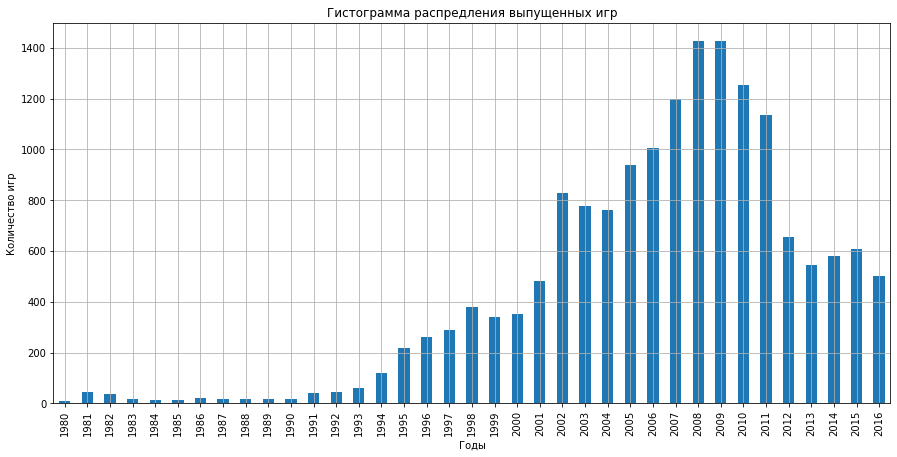

In [24]:
# Построим гистограмму по количеству игр выпущенные в разное время:
data.groupby('year_of_release')['name'].count().plot(kind ='bar',y = 'name',figsize=(15, 7), grid=True)
plt.title('Гистограмма распредления выпущенных игр')
plt.xlabel('Годы')
plt.ylabel('Количество игр')
plt.show()

На графике наблюдаем несколько этапов (плато, резкий рост, падение):
1. с 1980 - 1990 наблюдаем плато по выпуску новых игр,причины это отсутствие  доступной вычислительной техники у обывателей, в это время основная масса компьютеров была сосредоточена в руках военных и правительства;
2. с 1991 - 2009 резкий бум по выпуску игр, связано с увеличением вычислительных мощностей ПК , а именно графических возможностей техники, а так же рост выпуска игр можно связать с ростом количества ПК дома. 
3. С 2010 по н.в. падение выхода новых игр  связан с переключением разработчиков на мобильные игры.



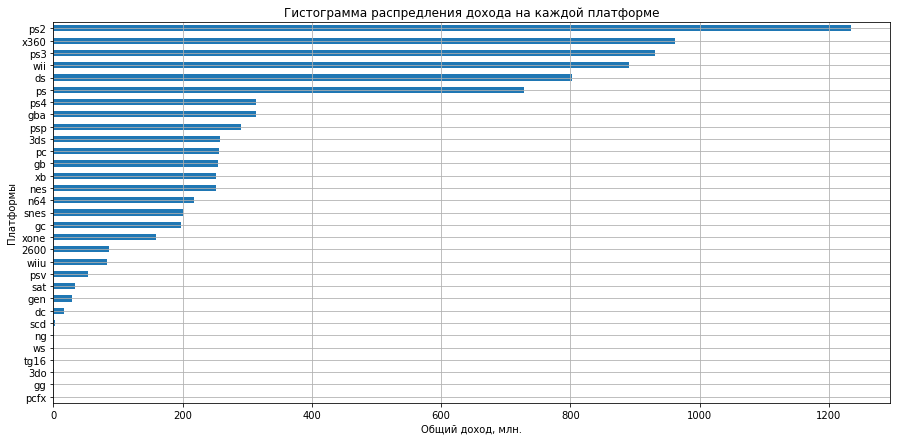

In [25]:
# Сгрупируем данные по общим продажам по платформам:
data.groupby('platform')['total_sales'].sum().sort_values().plot(kind='barh', y='total_sales',figsize=(15, 7), grid=True)
plt.title('Гистограмма распредления дохода на каждой платформе')
plt.xlabel('Общий доход, млн.')
plt.ylabel('Платформы')
plt.show()

ТОП 5 самых доходных платформ за все время:
1. PS2
2. X360
3. PS3
4. WII
5. DS

In [26]:
# Создадим новый датафрейм с топ 5 платформ по продажам, далее приведем к списку платформ:
top5_platform = data.groupby('platform')['total_sales'].sum().sort_values(ascending = False).head().reset_index()
top5_platform = top5_platform['platform'].tolist()
display(top5_platform)

['ps2', 'x360', 'ps3', 'wii', 'ds']

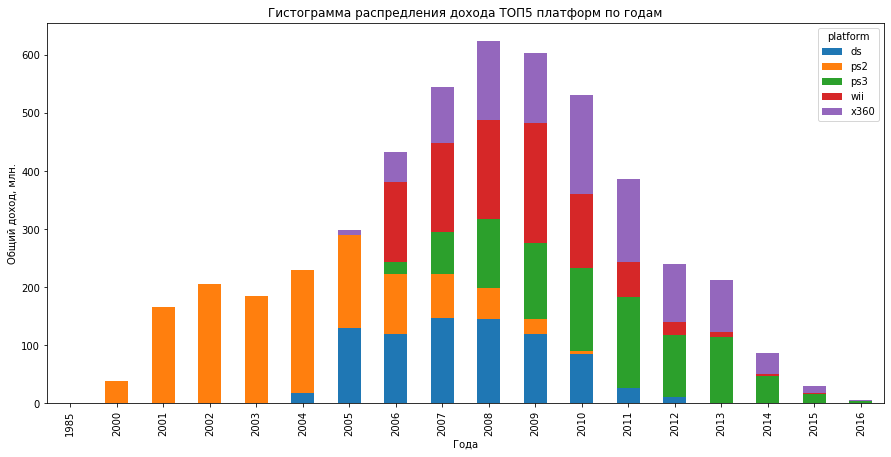

In [27]:
# Построим гистограмму топ 5 платформ по продажам по годам:  
fig, ax = plt.subplots(figsize=(15, 7))
pd.pivot_table(data.query('platform.isin(@top5_platform)'),
    index ='year_of_release',
    columns ='platform',
    values ='total_sales', 
    aggfunc ='sum').plot(ax=ax, kind ='bar',stacked =True )
plt.title('Гистограмма распредления дохода ТОП5 платформ по годам')
plt.xlabel('Года')
plt.ylabel('Общий доход, млн.')
plt.show()
   

Платформа живет в среднем за 10 лет, за это время проходит несколько фаз  резкий рост , плато и спад. Пик по продажам примерно через 5 лет. Все в полне закономерно, появляются новые платформы и старые постепенно уходят на покой.


Жизнь платформ с максимальным количеством продаж за все время:
* ps2 c 2000 по 2010
* ds с 2004 по 2012
* ps3 c 2006 по 2016
* wii  с 2006 по 2015
* x360 с 2005 по 2015

Рассмотрев данную гистограмму, можно сделать вывод, что данные платформы не представляют для нас интереса для рекламы, потому что каждая из платформ уже либо закончила свой цикл жизни, либо уже около финала. Необходимо рассмотреть другие платформы за актуальный для нас период. 

Не имеет никакого смысла рассматривать данные для рекламной компании временной диапазон до 2013г. т.к. данные до 2013г. можно считать не актуальными:
* в среднем пик по продажам достигается через 5 лет;
* с 2013 г. наблюдаем плато или небольшое уменьшение;
* с 2013 г. вышли самые актуальные платформы или выйдут в ближайшее время.

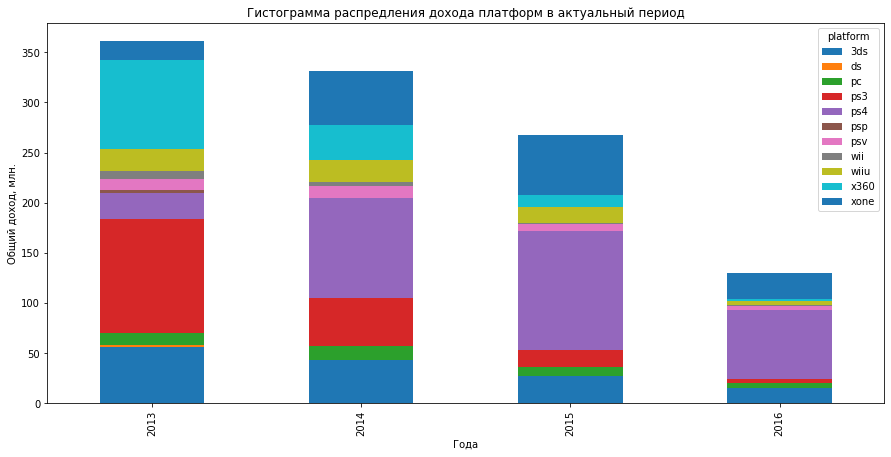

In [28]:
# Построим гистограмму по продажам по годам для актуального периода:  
fig, ax = plt.subplots(figsize=(15, 7))
pd.pivot_table(data.query('year_of_release >="2013"'),
    index ='year_of_release',
    columns ='platform',
    values ='total_sales', 
    aggfunc ='sum').plot(ax=ax, kind ='bar' ,stacked =True)
plt.title('Гистограмма распредления дохода платформ в актуальный период')
plt.xlabel('Года')
plt.ylabel('Общий доход, млн.')
plt.show()

* наблюдаем планомерное снижение продаж для всех платформ;
* актуальные платформы интересные для рекламной компании ps4, 3ds, xone.

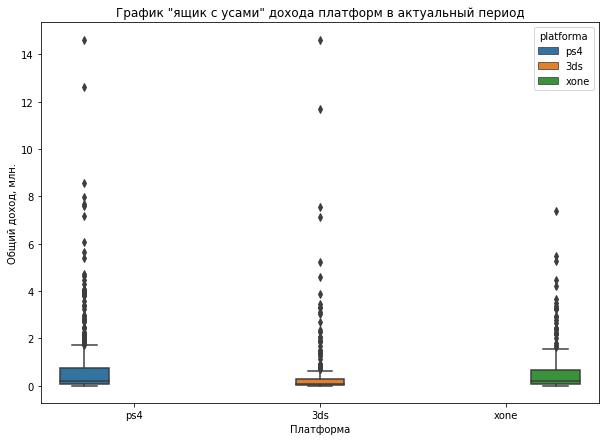

In [29]:
# Построим категориальный график по глобальным продажам за актуальный период по интересным нам платформам:
data_ps4 = data.query('platform == "ps4" and year_of_release >="2013"')
data_3ds = data.query('platform == "3ds" and year_of_release >="2013"')
data_xone = data.query('platform == "xone" and year_of_release >="2013"')

data_ps4['platforma'] = 'ps4'
data_3ds['platforma'] = '3ds'
data_xone['platforma'] = 'xone'

temp = pd.concat([data_ps4, data_3ds, data_xone])
plt.figure(figsize=(10, 7))
sns.boxplot(x='platform', y='total_sales', data=temp , hue='platforma')
plt.title('График "ящик с усами" дохода платформ в актуальный период')
plt.xlabel('Платформа')
plt.ylabel('Общий доход, млн.')


plt.show()

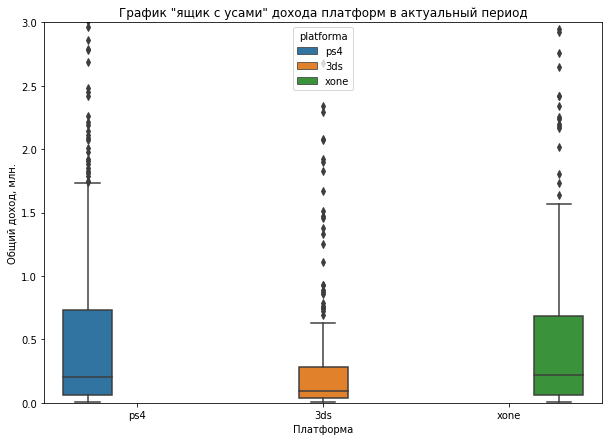

In [30]:
# Приблизим категориальный график по глобальным продажам за актуальный период по интересным нам платформам:
data_ps4 = data.query('platform == "ps4" and year_of_release >="2013"')
data_3ds = data.query('platform == "3ds" and year_of_release >="2013"')
data_xone = data.query('platform == "xone" and year_of_release >="2013"')

data_ps4['platforma'] = 'ps4'
data_3ds['platforma'] = '3ds'
data_xone['platforma'] = 'xone'

temp = pd.concat([data_ps4, data_3ds, data_xone])
plt.figure(figsize=(10, 7))
sns.boxplot(x='platform', y='total_sales', data=temp , hue='platforma')
plt.title('График "ящик с усами" дохода платформ в актуальный период')
plt.xlabel('Платформа')
plt.ylabel('Общий доход, млн.')

plt.axis([None, None, 0, 3])
plt.show()

Наблюдаем следующее:
* Средняя медиана по платформа 0.2 - 0.25;
* Верхняя граница предела для платформ ps4 и xone примерно составляет 1.7млн., далее идут выбросы.



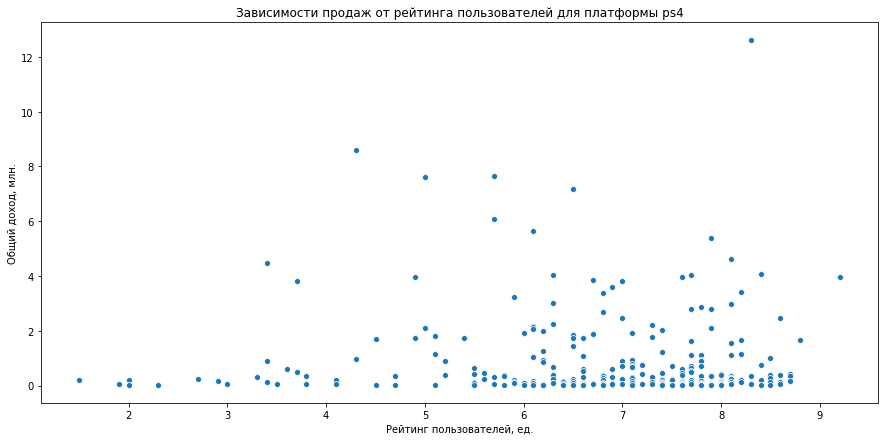

In [31]:
# Построим  график зависимости продаж от рейтинга пользователей для платформы ps4:
plt.figure(figsize=(15,7))
sns.scatterplot(x='user_score', y='total_sales', data=data.query('platform == "ps4" and year_of_release >="2013"'))
plt.title('Зависимости продаж от рейтинга пользователей для платформы ps4')
plt.xlabel('Рейтинг пользователей, ед.')
plt.ylabel('Общий доход, млн.')
plt.show()

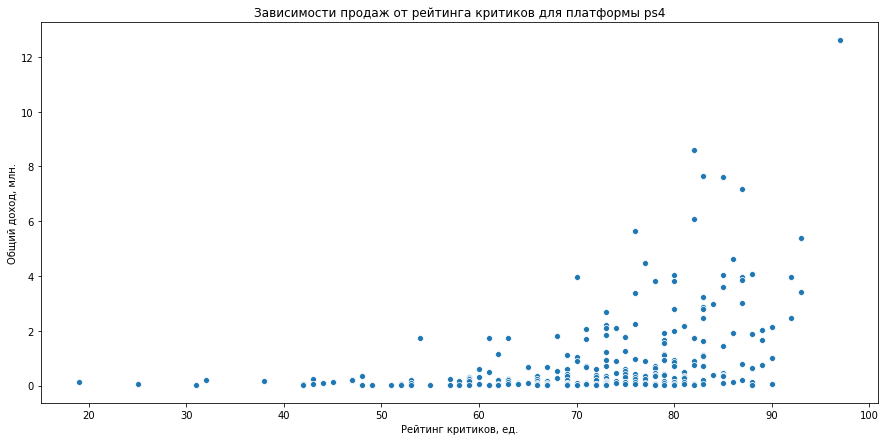

In [32]:
# Построим  график зависимости продаж от рейтинга критиков для платформы ps4:
plt.figure(figsize=(15,7))
sns.scatterplot(x='critic_score', y='total_sales', data=data.query('platform == "ps4" and year_of_release >="2013"'))
plt.title('Зависимости продаж от рейтинга критиков для платформы ps4')
plt.xlabel('Рейтинг критиков, ед.')
plt.ylabel('Общий доход, млн.')
plt.show()

In [33]:
# Построим таблицу корреляции для отдельных столбцев:
сorr_parm = data.query('platform == "ps4" and year_of_release >="2013"')[['critic_score','user_score','total_sales']].corr().round(2)
display(сorr_parm)

,critic_score,user_score,total_sales
critic_score,1.00,0.56,0.41
user_score,0.56,1.00,-0.03
total_sales,0.41,-0.03,1.00


* Наблюдаем среднию положительную зависимость (коэффицент корреляции **0.56** ) рейтинга критиков на рейтинг пользователей;
* Наблюдаем среднию положительную зависимость (коэффицент корреляции **0.41**) рейтинга критиков на продажи;
* Наблюдаем минимальную отрицательную зависимость (коэффицент корреляции **-0.03**) рейтинга пользователей на продажи.

Возможные причины слабой зависимости рейтинга пользователей и критиков на продажи, заключается в том, что достаточно мало действительно стоящих игр, поэтому приходится покупать и играть в то, что выпускают.
Отсутствие новых качественных проектов и снижает из года в год продажи по платформам, людям попросту не во что играть.

In [34]:
# Cоздадим функцию для построения графиков корреляция и нахождения коэффицента кореляции:
def platform_actual_matrix(platforms):
    platform = data[(data['platform']==platforms) & (data['year_of_release'] >="2013")]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
    fig.suptitle(platforms, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    correl_user = platform['user_score'].corr(platform['total_sales'])
    correl_critic = platform['critic_score'].corr(platform['total_sales'])
    correl_critic_to_users = platform['critic_score'].corr(platform['user_score'])
    print('Коэффицент корреляции рейтинга пользователей на продажи: {:.2f}'.format(correl_user))
    print('Коэффицент корреляции рейтинга критиков на продажи: {:.2f}'.format(correl_critic))
    print('Коэффицент корреляции рейтинга критиков на рейтинг пользователей: {:.2f}'.format(correl_critic_to_users))

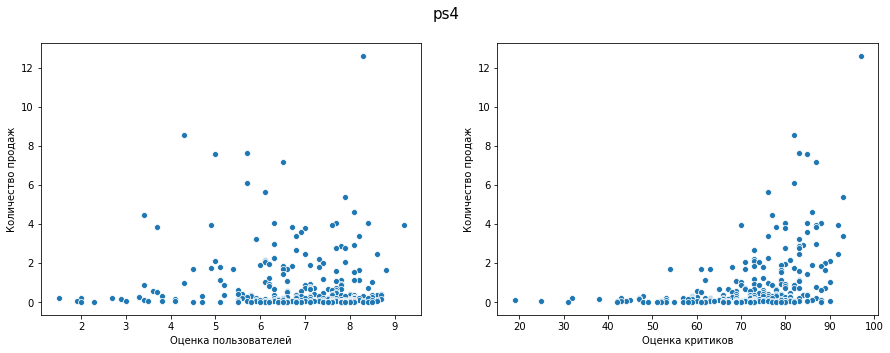

Коэффицент корреляции рейтинга пользователей на продажи: -0.03
Коэффицент корреляции рейтинга критиков на продажи: 0.41
Коэффицент корреляции рейтинга критиков на рейтинг пользователей: 0.56


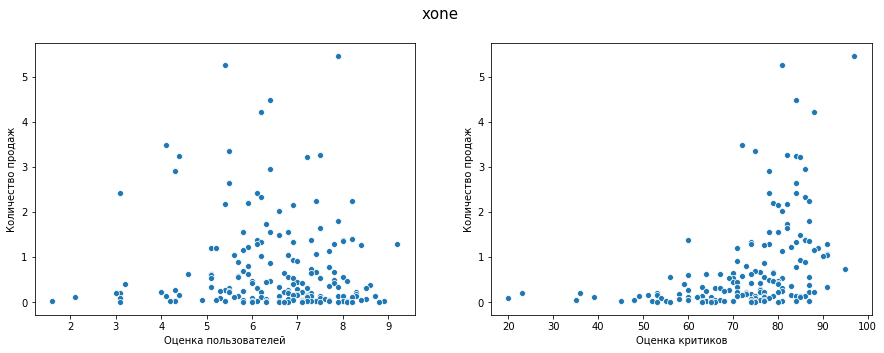

Коэффицент корреляции рейтинга пользователей на продажи: -0.07
Коэффицент корреляции рейтинга критиков на продажи: 0.42
Коэффицент корреляции рейтинга критиков на рейтинг пользователей: 0.47


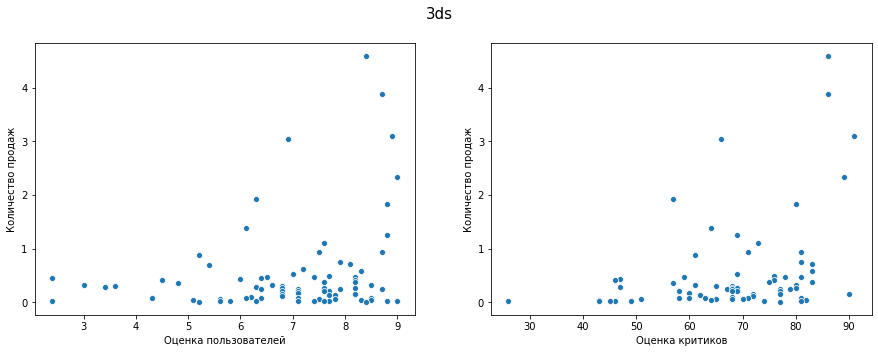

Коэффицент корреляции рейтинга пользователей на продажи: 0.24
Коэффицент корреляции рейтинга критиков на продажи: 0.36
Коэффицент корреляции рейтинга критиков на рейтинг пользователей: 0.77


In [35]:
# Создадим циклдля актуальных платформ на основе нашей функции:
actual_platform = ['ps4','xone','3ds']
for platforms in actual_platform: 
    platform_actual_matrix(platforms)

Картина совпадает платформах PS4 и XONE совпадает, среднее влияние рейтинга критиков на продажи (среднее 0.41) и на рейтинг пользователей (среднее 0.51), и полное отсутствие влияния рейтинга пользователей на продажи (среднее -0.05) в отличии от платформы 3DS где влияние рейтинга пользователей на продажи составляет  0.24


In [36]:
# Построим таблицу корреляции для отдельных столбцев:
сorr_parm = data.query('year_of_release >="2013"')[['critic_score','user_score','total_sales']].corr().round(2)
display(сorr_parm)

,critic_score,user_score,total_sales
critic_score,1.00,0.5,0.31
user_score,0.50,1.0,-0.00
total_sales,0.31,-0.0,1.00


Рассмотрев коэффиценты корреляции за актуальный период на всех платформах  прослеживается общая тенденция, что рейтинг критиков на продажи имеет среднее положительное влияние (**0.5**) , влияния рейтнг пользователей на продажи не оказывает (**0**), а рейтинг критиков на рейтинг пользователей имеет небольшое положительное влияние (**0.31**).

In [38]:
# Создадим таблицу по жанрам с общим доходом, кол-вом игры и стоимости для одной игры:
sales_genre_data = data.query('year_of_release >="2013"').groupby('genre').agg({'total_sales':'sum','name':'count'}).sort_values(by ='total_sales', ascending =False).reset_index()
sales_genre_data['sales_per_game'] = (sales_genre_data['total_sales'] / sales_genre_data['name']).round(2)
sales_genre_data.columns = ['genre','total_sales','total_count_games','sales_per_game']
display(sales_genre_data)

,genre,total_sales,total_count_games,sales_per_game
0,action,321.87,766,0.42
1,shooter,232.98,187,1.25
2,sports,150.65,214,0.70
3,role-playing,145.89,292,0.50
4,misc,62.82,155,0.41
5,platform,42.63,74,0.58
6,racing,39.89,85,0.47
7,fighting,35.31,80,0.44
8,adventure,23.64,245,0.10
9,simulation,21.76,62,0.35


* выделяются жанры с низкими (puzzle - **3.17 млн.**, strategy - **10.08 млн.**) и высокими продажами(action - **321.87 млн.**,shooter - **232.98 млн.**,sports - **150.65 млн.**);
* самые прибыльные жанры это подвижные жанры в плане действий, а соответственно и самые дорогие в разработке;
* жанры action (**766 шт.**), role-playing (**292 шт.**), adventure (**245 шт.**)	и sports (**214 шт.**) имеют большое кол-во игры когда либо разработанных и выпущенных на всех платформах в актуальные период;
* жанр shooter  имеет самую высокую доходность для каждой игры **1.25 млн.** 

# Вывод:

* построили гистограмму по количеству игр выпущенные в разное время;
* опредили топ5 самых доходных платформ за все время (ps2, x360, ps3, wii, ds);
* определили средний срок жизни платформы (10лет), ее этапы(рост, плато и угасание);
* выделили актуальный период(2013 - 2016г.) для рекламной кампании на 2017г и перспективные платформы (ps4,xone, 3ds);
* пронаблюдали зависимость рейтинга критиков и пользователей на продажи;
* опередили жанры игр с низкими (puzzle, strategy) и высокими продажами(action,shooter,sports).

# Шаг 4. Составим портрет пользователя каждого региона:

In [39]:
# Напишем функцию для определения портрета пользователя региона(топ5 платформ, топ 5 жанра и рейтинг):
def user_region(data, region_sales):
    actual_data = data.query('year_of_release >="2013"')
    display(actual_data.pivot_table( index ='platform', values = region_sales, aggfunc='sum')
            .sort_values(by =region_sales, ascending =False).head().reset_index()
           )
    display(actual_data.pivot_table( index ='genre', values = region_sales, aggfunc='sum')
            .sort_values(by = region_sales, ascending =False).head().reset_index()
           )
    display(actual_data.pivot_table( index ='rating', values = region_sales, aggfunc='sum')
            .sort_values(by = region_sales, ascending =False).head().reset_index()
           )
  

In [40]:
# Портрет пользователя NA:
user_region(data, 'na_sales')

,platform,na_sales
0,ps4,108.74
1,xone,93.12
2,x360,81.66
3,ps3,63.50
4,3ds,38.20


,genre,na_sales
0,action,126.05
1,shooter,109.74
2,sports,65.27
3,role-playing,46.40
4,misc,27.49


,rating,na_sales
0,M,165.21
1,unknown,89.42
2,E,79.05
3,E10+,54.24
4,T,49.79


In [41]:
# Портрет пользователя EU:
user_region(data, 'eu_sales')

,platform,eu_sales
0,ps4,141.09
1,ps3,67.81
2,xone,51.59
3,x360,42.52
4,3ds,30.96


,genre,eu_sales
0,action,118.13
1,shooter,87.86
2,sports,60.52
3,role-playing,36.97
4,racing,20.19


,rating,eu_sales
0,M,145.32
1,E,83.36
2,unknown,78.91
3,E10+,42.69
4,T,41.95


In [42]:
# Портрет пользователя JP:
user_region(data, 'jp_sales')

,platform,jp_sales
0,3ds,67.81
1,ps3,23.35
2,psv,18.59
3,ps4,15.96
4,wiiu,10.88


,genre,jp_sales
0,role-playing,51.04
1,action,40.49
2,misc,9.20
3,fighting,7.65
4,shooter,6.61


,rating,jp_sales
0,unknown,85.05
1,T,20.59
2,E,15.14
3,M,14.11
4,E10+,5.89


# Вывод:

* EU и NA  пользователи похоже по своим предпочтениям по жанрам (action,shooter,sports и тд.) и выборе платформы, лидирует PS4.
* Пользователь из JP кардинально отличается, предпочитает в платформе 3DS и любимый жанр - role-playing;
* По рейтингу ESRB в EU и NA  лидирует рейтинг 18+, обилее насилия и жестокости, характерные для для жанров (action,shooter);
* в JP лидирует рейтинг, который был не определен, возможно он соответствует специфичному для этого региона жанра role-playing.

# Шаг 5. Проверим гипотезы:

**Гипотеза №1**

In [44]:
# Найдем диспресию для двух выборок тестом Левена:
from scipy.stats import levene
a=actual_data[actual_data['platform'] =="xone"]['user_score']
b=actual_data[actual_data['platform'] =="pc"]['user_score']
stat, p = levene(a,b)
display(p)

0.004442299673698059

Малое значение p (при проверке тестом Левена и Бартлетта) говорит нам, что дисперсия для двух выборк не совпадает, значит при проверки нулевой гипотезы будем использовать st.ttest_ind аргумент equal_var=False т.к. он говорит методу что диспресия выборок не равны.

Сформулируем гипотезы:
* H0:Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* H1:Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые

In [45]:
array1 = actual_data[actual_data['platform'] =="xone"]['user_score']
array2 = actual_data[actual_data['platform'] =="pc"]['user_score']

alpha = .05 

results = st.ttest_ind(array1,array2,equal_var=False )

print('p-значение:', results.pvalue) 

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.17882648263401307
Не получилось отвергнуть нулевую гипотезу


**Вывод**: Полученное р-значение больше порогового alpha, поэтому нулевая гипотеза была принята. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Гипотеза №2**

In [46]:
# Найдем диспресию для двух выборок тестом Левена:
from scipy.stats import levene
a=actual_data[actual_data['genre'] =="action"]['user_score']
b=actual_data[actual_data['genre'] =="sports"]['user_score']
stat, p = levene(a,b)
display(p)

0.05683583033238032

Малое значение p (при проверке тестом Левена и Бартлетта) говорит нам, что дисперсия для двух выборк не совпадает, значит при проверки нулевой гипотезы будем использовать st.ttest_ind аргумент equal_var=False т.к. он говорит методу что диспресия выборок не равны.

Сформулируем гипотезы:
* H0:Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.
* H1:Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [47]:
array1 = actual_data[actual_data['genre'] =="action"]['user_score']
array2 = actual_data[actual_data['genre'] =="sports"]['user_score']

alpha = .05 

results = st.ttest_ind(array1,array2,equal_var=False)

print('p-значение:', results.pvalue) 

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 1.0496920005008588e-13
Отвергаем нулевую гипотезу


**Вывод**: Полученное р-значение маленькое поэтому мы отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

# Шаг 6. Общий вывод:

Проанализировав данные полученные из открытых источников о продажах игр, оценках пользователей и экспертов, жанрах и платформах определим результаты исследования:

* актуальные период **2013-2016г.**;
* перспективные платформы (**ps4,xone, 3ds**);
* жанры игр с низкими (puzzle - **3.17 млн.**, strategy - **10.08 млн.**) и высокими продажами(action - **321.87 млн.**,shooter - **232.98 млн.**,sports - **150.65 млн.**);
* жанр shooter  имеет самую высокую доходность для каждой игры **1.25 млн.** 
* для различных регионов необходимо продивигать различные жанры игр (EU и NA - action,shooter,sports на PS4;  JP - role-playing на 3DS );
* рейтинг критиков на продажи имеет среднее положительное влияние (**0.5**) , влияния рейтнг пользователей на продажи не оказывает (**0**), а рейтинг критиков на рейтинг пользователей имеет небольшое положительное влияние (**0.31**);


Результаты по гипотезам которые мы выдвигали в начале исследования:
* Гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" **потвердилась**.
* Гипотеза "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные." **потвердилась**.


